## Machine Learning Project Work Space 

Title of Your Project: Understanding Customer Sentiment and QnA over Amazon Product Reviews
Short Description of Your Project and Objectives:


We aim to analyze customer sentiment and extract key complaints from Amazon product reviews
using transformer-based NLP techniques. Our project will try to leverage models to perform
fine-grained sentiment analysis and topic modeling to uncover common issues or praise patterns
across thousands of reviews. Additionally, we will try to prototype a QnA bot that enables users to
query the reviews intelligently. For example, by asking “What do people say about the product?”
or “What are some negative qualities of this product?”. This system has the potential to scale
across e-commerce platforms like Amazon and Shopify to improve user experience and support
business decision-making.


Selected Dataset: Amazon Product Reviews
(https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/)

Description of Your Selected Dataset (data source, number of variables, size of dataset, etc.)

## First Level Analysis 

The code below is to get a general idea of the data being used. After the analiysis we will know a gereral idea of customer sentiment, products being reviewed and the words that occur most in the reviews. 


Second level and Third level will dive further into each product.  

In [1]:
#!pip install transformers


In [2]:
import pandas as pd
from transformers import pipeline, AutoTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. Data preparation
df = pd.read_csv('amazon_reviews.csv')
reviews = df['reviews.text'].astype(str).tolist()

# 2. Sentiment analysis with truncation
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model=model_name,
    tokenizer=tokenizer,
    truncation=True,  
    max_length=512    
)
sentiments = sentiment_analyzer(reviews[:1000])  

# 3. Topic modeling 
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(reviews)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

# Display topics
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


Topic #1:
great tablet price use easy games loves good old perfect
Topic #2:
bought gift loves christmas love purchased got loved great tablet
Topic #3:
batteries good price great work long value buy battery just
Topic #4:
kindle love echo alexa use music easy great read light
Topic #5:
tablet great kids amazon easy use love apps tv product


In [3]:
print(df.head())

                   asins  reviews.rating  \
0  B00QWO9P0O,B00LH3DMUO             3.0   
1  B00QWO9P0O,B00LH3DMUO             4.0   
2  B00QWO9P0O,B00LH3DMUO             5.0   
3  B00QWO9P0O,B00LH3DMUO             5.0   
4  B00QWO9P0O,B00LH3DMUO             5.0   

                                                name         brand  \
0  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
1  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
2  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
3  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
4  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   

                                          categories  \
0  AA,AAA,Health,Electronics,Health & Household,C...   
1  AA,AAA,Health,Electronics,Health & Household,C...   
2  AA,AAA,Health,Electronics,Health & Household,C...   
3  AA,AAA,Health,Electronics,Health & Household,C...   
4  AA,AAA,Health,Electronics,Healt

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Sentiment Analysis

POSITIVE    614
NEGATIVE    386
dtype: int64


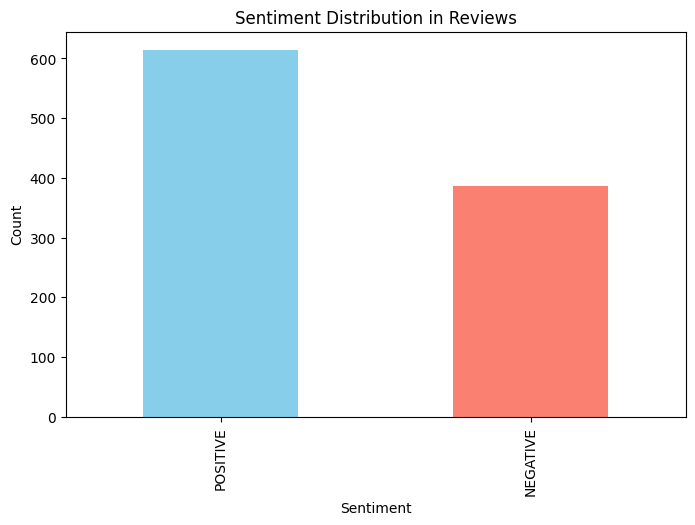

Review 1: NEGATIVE (score: 1.00)
I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work....

Review 2: NEGATIVE (score: 1.00)
Bulk is always the less expensive way to go for products like these...

Review 3: POSITIVE (score: 1.00)
Well they are not Duracell but for the price i am happy....

Review 4: POSITIVE (score: 0.66)
Seem to work as well as name brand batteries at a much better price...

Review 5: POSITIVE (score: 1.00)
These batteries are very long lasting the price is great....



In [5]:
# Analyze a sample (first 1000 reviews for speed)
sample = reviews[:1000]
sentiments = sentiment_analyzer(sample)

# Extract labels and scores
labels = [result['label'] for result in sentiments]
scores = [result['score'] for result in sentiments]

# Count sentiment labels
label_counts = pd.Series(labels).value_counts()
print(label_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print the first few results
for i, (review, label, score) in enumerate(zip(sample, labels, scores)):
    print(f"Review {i+1}: {label} (score: {score:.2f})")
    print(review[:200] + "...")
    print()
    if i >= 4:  # Print only first 5
        break

## Topic Modeling 

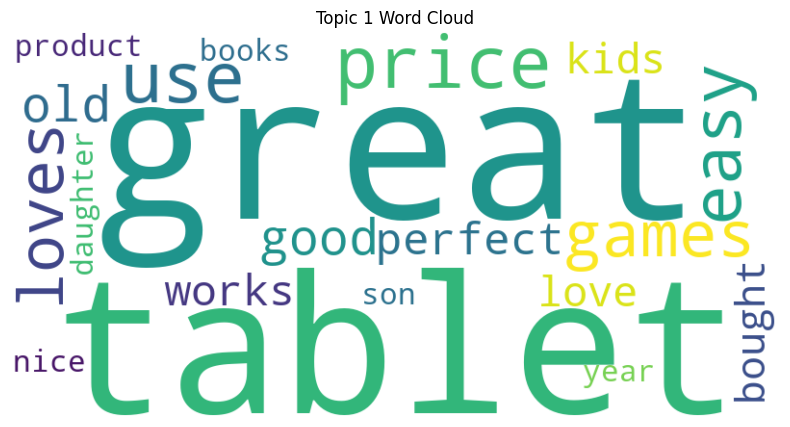

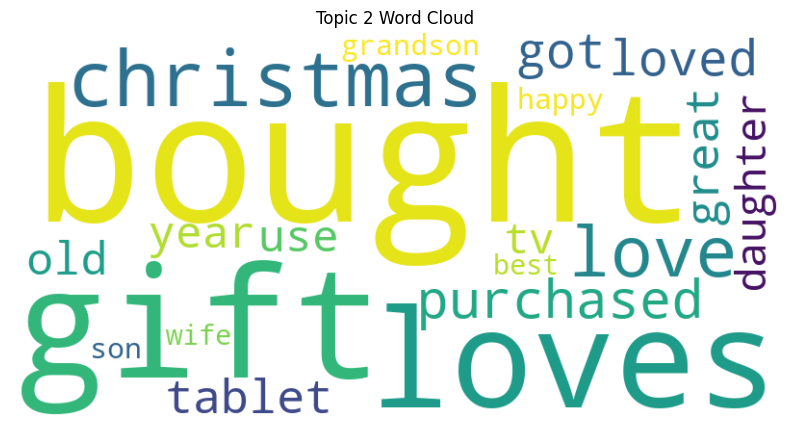

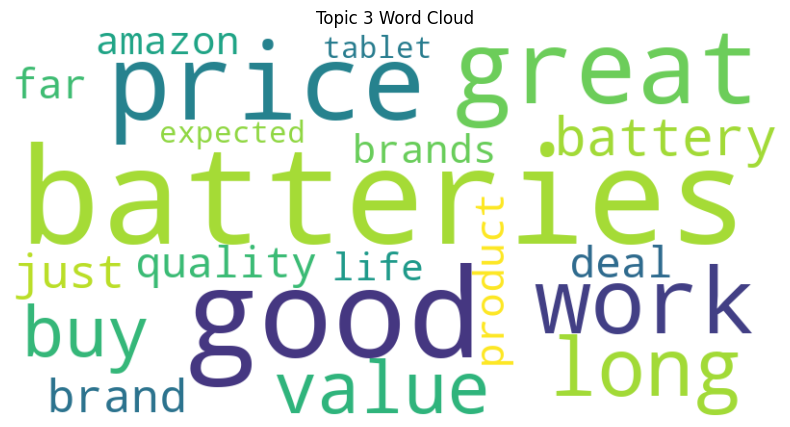

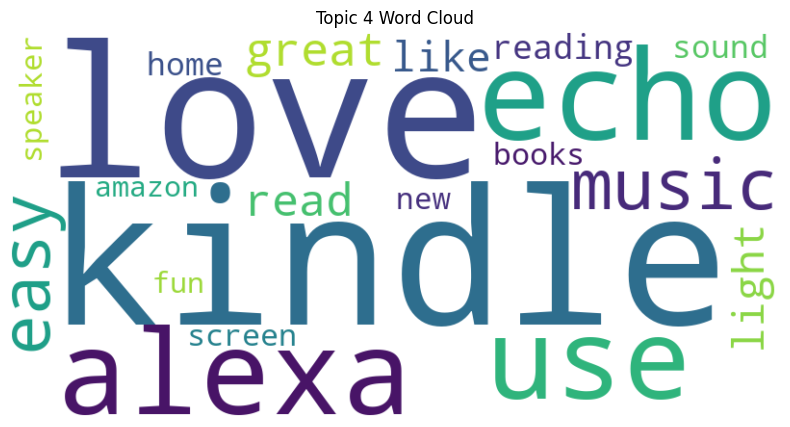

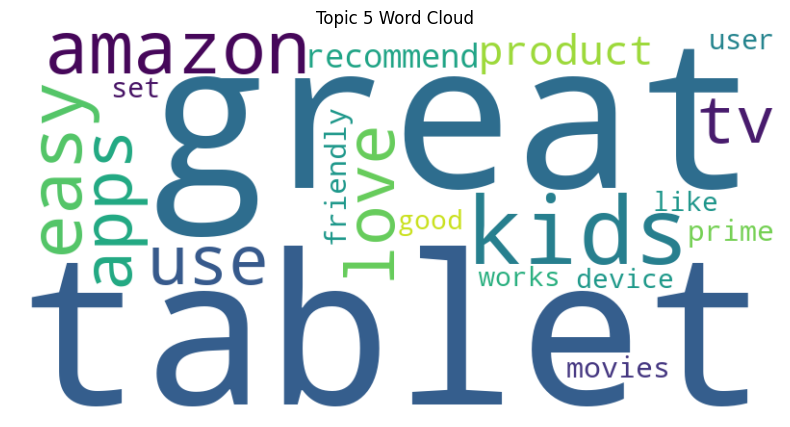

In [6]:
# Preprocess and vectorize
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(reviews)
feature_names = vectorizer.get_feature_names_out()

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

# Function to generate word cloud for a topic
def topic_wordcloud(topic_idx, n_words=20):
    topic = lda.components_[topic_idx]
    top_words_idx = topic.argsort()[-n_words:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    freqs = {word: topic[i] for word, i in zip(top_words, top_words_idx)}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freqs)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx + 1} Word Cloud')
    plt.show()

# Generate word clouds for each topic
for topic_idx in range(lda.n_components):
    topic_wordcloud(topic_idx)